### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ким Реачна
##### Группа:  НПИ-01-20

## Москва 2023
***

### Вариант № 20

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
name = 'yeast.data'
target = 9
feature = 2

In [ ]:
df = pd.read_csv("../data/yeast.data",
                 delimiter="  ", header=None, on_bad_lines='skip')
df.head()

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

In [ ]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 1479
Число признаков = 10
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0
	9: 0


In [ ]:
df.dropna(subset=[feature], inplace=True)
df.dropna(subset=[target], inplace=True)

In [ ]:
df.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9     object
dtype: object

In [ ]:
df[target].value_counts()

CYT    463
NUC    424
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: 9, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

0    463
7    424
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: 9, dtype: int64

In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6


In [ ]:
df = df.select_dtypes(exclude=['object'])

3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

In [ ]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 1479
Число признаков = 9
Число пропущенных значений:
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0
	9: 0


In [ ]:
print(df.shape), print(df.shape[0]*0.05)

(1479, 9)
73.95


(None, None)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2)
dbscan.fit(df)
cluster_labels = dbscan.labels_
pd.Series(cluster_labels).value_counts()

 2    443
 1    406
 0    235
 6    152
-1     96
 3     41
 5     40
 4     32
 7     22
 8      6
 9      6
dtype: int64

In [ ]:
df = df[cluster_labels != -1]

4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = df.values
np.set_printoptions(precision=3)
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = df.columns

In [ ]:
y = df[target].astype(int)
y1 = X[feature].astype(float)
X = pd.DataFrame(X).drop([feature],axis=1).astype(float)
X = X[X.columns[X.nunique() > 50]].values

In [ ]:
X.shape

(1383, 4)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.feature_selection import RFE

model = Lasso()
rfe = RFE(model)
fit = rfe.fit(X, y);
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

selected_features = []
for feature, support in zip(pd.DataFrame(X).columns, fit.support_):
    if support: 
        selected_features.append(feature)

print("Выбранные признаки: %s" % selected_features[:3])
X_2 = pd.DataFrame(X)[[1,2,3]].values

Число признаков: 2
Выбранные признаки: [False False  True  True]
Ранг признаков: [3 2 1 1]
Выбранные признаки: [2, 3]


In [ ]:
X = X_2

5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

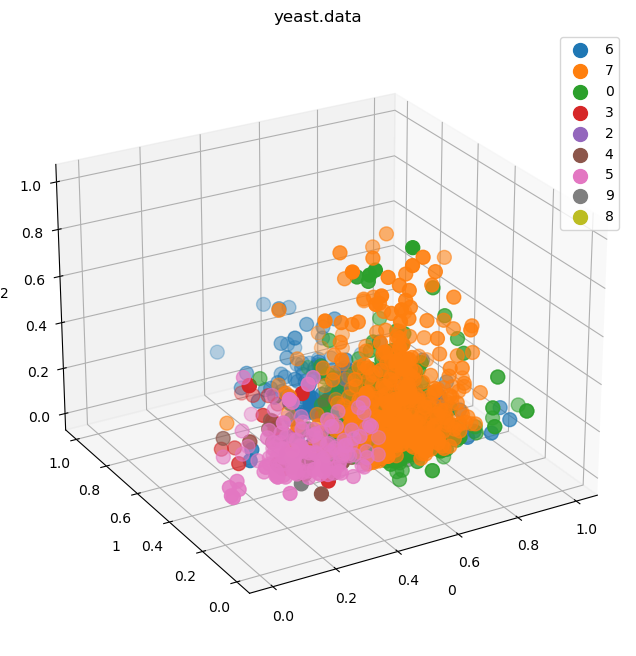

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in (y.unique()):
    row_ix = np.where(y== i)
    a=X[row_ix, 0]
    b=X[row_ix, 1]
    c=X[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i)

plt.title(name)
ax.set_xlabel(pd.DataFrame(X).columns[0])
ax.set_ylabel(pd.DataFrame(X).columns[1])
ax.set_zlabel(pd.DataFrame(X).columns[2])
plt.legend()

ax.view_init( azim=-120, elev=25 );

6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[:,0].reshape(-1,1), y1, test_size=0.3, random_state=666)

poly_reg = PolynomialFeatures()
lin_reg = LinearRegression()
param_grid1 = {'poly__degree': [2, 3, 4, 5]}
poly_lin_reg = Pipeline([('poly', poly_reg), ('linear', lin_reg)])
grid_search1_1 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_1.fit(X_train1, y_train1)
best_degree_poly1 = grid_search1_1.best_params_

model2 = Ridge()
param_grid2 = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search2_1 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_1.fit(X_train1, y_train1)
best2_1 = grid_search2_1.best_params_

model3 = DecisionTreeRegressor()
param_grid3 = {'max_leaf_nodes': [5, 6, 7, 8, 9, 10]}

grid_search3_1 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_1.fit(X_train1, y_train1)
best3_1 = grid_search3_1.best_params_

print(best_degree_poly1,best2_1,best3_1)

{'poly__degree': 2} {'alpha': 1.0} {'max_leaf_nodes': 5}


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[:,1].reshape(-1,1), y1, test_size=0.3, random_state=666)

grid_search1_2 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_2.fit(X_train2, y_train2)
best_degree_poly2 = grid_search1_2.best_params_

grid_search2_2 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_2.fit(X_train2, y_train2)
best2_2 = grid_search2_2.best_params_

grid_search3_2 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_2.fit(X_train2, y_train2)
best3_2 = grid_search3_2.best_params_

print(best_degree_poly2,best2_2,best3_2)

{'poly__degree': 3} {'alpha': 1.0} {'max_leaf_nodes': 5}


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[:,2].reshape(-1,1), y1, test_size=0.3, random_state=666)


grid_search1_3 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_3.fit(X_train2, y_train2)
best_degree_poly3 = grid_search1_3.best_params_

grid_search2_3 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_3.fit(X_train3, y_train3)
best2_3 = grid_search2_3.best_params_

grid_search3_3 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_3.fit(X_train3, y_train3)
best3_3 = grid_search3_3.best_params_

print(best_degree_poly2,best2_3,best3_3)

{'poly__degree': 3} {'alpha': 1.0} {'max_leaf_nodes': 5}


7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [ ]:
labels=[poly_reg,model2,model3]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error


def mspe(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100


scorer=mspe

In [ ]:
X=pd.DataFrame(X)
X[3]=y1

In [ ]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search2_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search3_1.best_estimator_.predict(X_test1), y_test1)

(10.330313991022418, 10.076899488427884, 10.601166514227375)

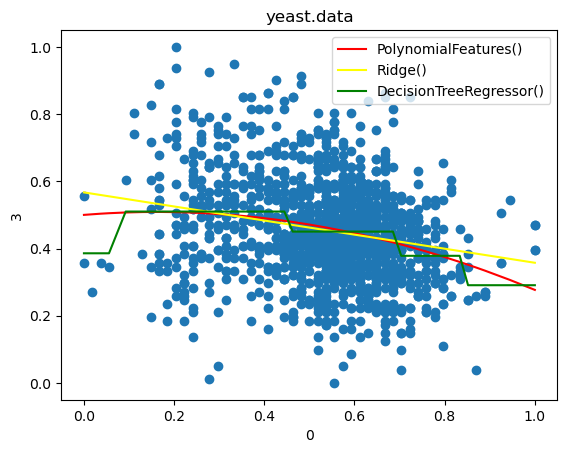

In [ ]:
plt.scatter(X[0], X[3])
plt.plot(np.sort(X[0]), grid_search1_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='red',label=labels[0])
plt.plot(np.sort(X[0]), grid_search2_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='yellow',label=labels[1])
plt.plot(np.sort(X[0]), grid_search3_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='green',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[0])
plt.ylabel(feature)
plt.legend()
plt.show()

In [ ]:
scorer(grid_search1_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search3_2.best_estimator_.predict(X_test2), y_test2)

(10.997031582069427, 11.018630606990207, 11.160569482267254)

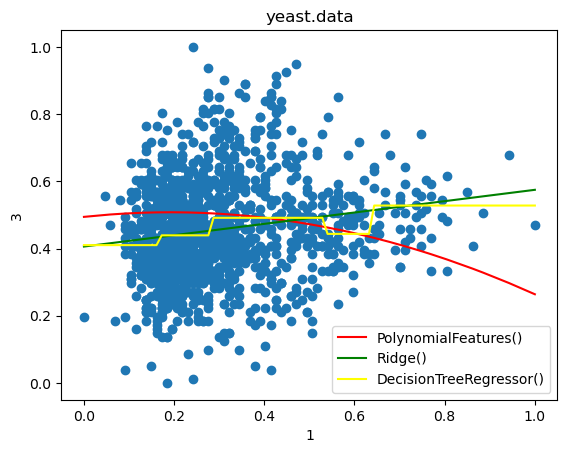

In [ ]:
plt.scatter(X[1], X[3])
plt.plot(np.sort(X[1]), grid_search1_1.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='red',label=labels[0])
plt.plot(np.sort(X[1]), grid_search2_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='green',label=labels[1])
plt.plot(np.sort(X[1]), grid_search3_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='yellow',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[1])
plt.ylabel(feature)
plt.legend()
plt.show()

In [ ]:
scorer(grid_search1_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_2.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(13.197473693802927, 14.15708320906354, 10.407038963291889)

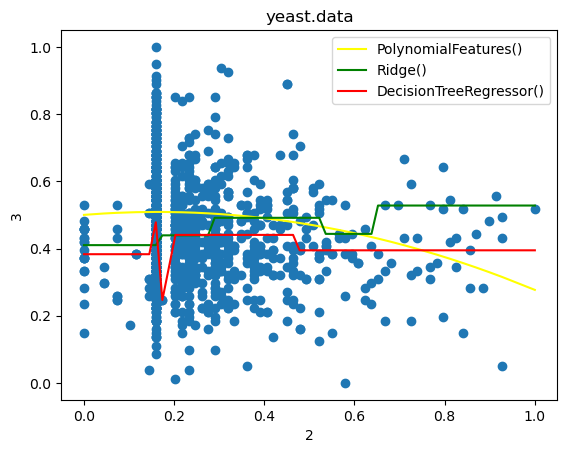

In [ ]:
plt.scatter(X[2], X[3])
plt.plot(np.sort(X[2]), grid_search1_1.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='yellow',label=labels[0])
plt.plot(np.sort(X[2]), grid_search3_2.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='green',label=labels[1])
plt.plot(np.sort(X[2]), grid_search3_3.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='red',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[2])
plt.ylabel(feature)
plt.legend()
plt.show()

8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

def mspe(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

scorer=max_error

In [ ]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search2_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search3_1.best_estimator_.predict(X_test1), y_test1)

(0.4927923760581878, 0.49651022492303176, 0.497675164341831)

In [ ]:
scorer(grid_search1_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search3_2.best_estimator_.predict(X_test2), y_test2)

(0.5448168090414454, 0.553357775251526, 0.5607688121222533)

In [ ]:
scorer(grid_search1_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search2_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(0.5799693418112701, 0.5380906844976592, 0.5219705142035236)

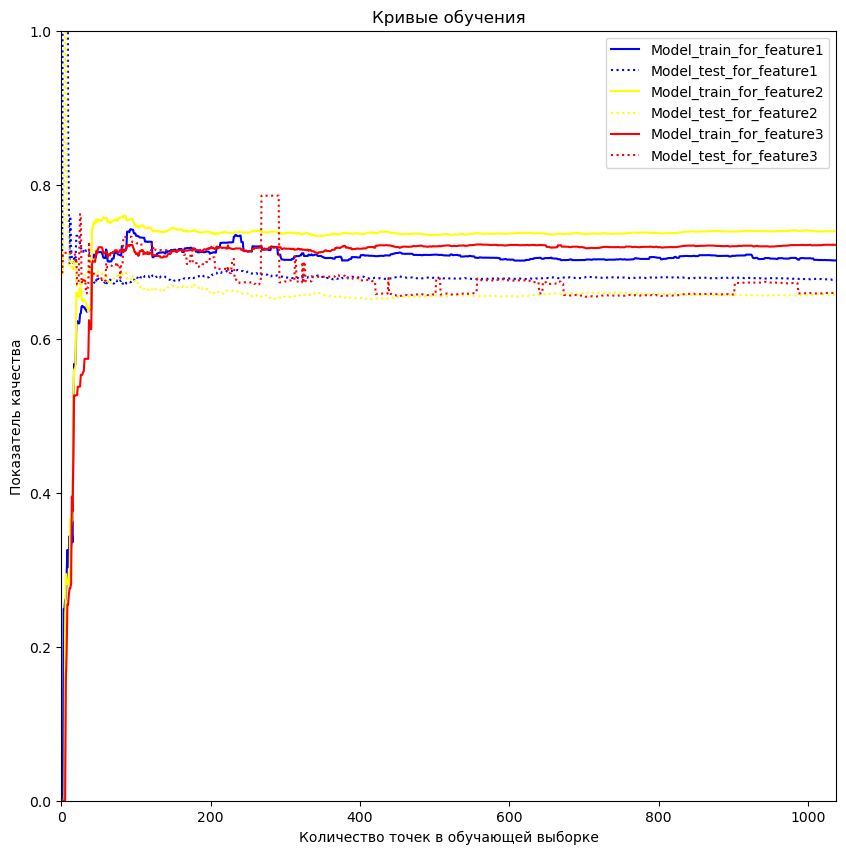

In [ ]:
def plot_learning_curve(algo, algo2, algo3, X):
    train_score, train_score2, train_score3 = [], [], []
    test_score, test_score2, test_score3 = [], [], []
    X_train, X_test, y_train, y_test = train_test_split(X[0].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(scorer(y_test, y_test_predict))

    X_train, X_test, y_train, y_test = train_test_split(X[1].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo2.fit(X_train[:i], y_train[:i])
        y_train_predict = algo2.predict(X_train[:i])
        train_score2.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo2.predict(X_test)
        test_score2.append(scorer(y_test, y_test_predict))

    X_train, X_test, y_train, y_test = train_test_split(X[2].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo3.fit(X_train[:i], y_train[:i])
        y_train_predict = algo3.predict(X_train[:i])
        train_score3.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo3.predict(X_test)
        test_score3.append(scorer(y_test, y_test_predict))

    plt.figure(figsize=(10, 10))
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score), label="Model_train_for_feature1", color='blue')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score), label="Model_test_for_feature1", linestyle='dotted', color='blue')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score2), label="Model_train_for_feature2", color='yellow')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score2), label="Model_test_for_feature2", linestyle='dotted', color='yellow')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score3), label="Model_train_for_feature3", color='red')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score3), label="Model_test_for_feature3", linestyle='dotted', color='red')
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 1])
    plt.title('Кривые обучения')
    plt.xlabel('Количество точек в обучающей выборке')
    plt.ylabel('Показатель качества')
    plt.show()

plot_learning_curve(grid_search1_1.best_estimator_, grid_search1_2.best_estimator_, grid_search3_3.best_estimator_, X)